In [1]:
from solver import *
from sim_data import *

In [2]:
def plot_util(all_lists, x, name, label_list):
    plt.figure()
    plt.xlabel('size of n')
    plt.ylabel("time")
    plt.title(name)

    for i in range(len(all_lists)):
        # TODO: check
        y = all_lists[i]
        plt.plot(x, y, label=label_list[i])
    plt.legend()
    plt.tight_layout()
    plt.show()

In [7]:
n_range = [10, 100] + [i for i in range(200, 1800, 200)]
# n_range = [10]
default_time_list, IAAL_time_list, ADMM_time_list = sim_multi(n_range, maxit=200, alpha=1e-4, tol=1e-3, seed=42, 
                                                              num_avg=5)

--------
size = 10
status: optimal, optimal value: -523.0081048676301
status: optimal, optimal value: -523.0081048676301
0/2000.0
-523.2921815746953
status: optimal, optimal value: -555.9843650723608
status: optimal, optimal value: -555.9843650723608
0/2000.0
-555.9692273927637
status: optimal, optimal value: -526.9951786066938
status: optimal, optimal value: -526.9951786066938
0/2000.0
-526.9951787190544
status: optimal, optimal value: -574.2008966410725
status: optimal, optimal value: -574.2008966410725
0/2000.0
-584.0470221207693
status: optimal, optimal value: -555.9843650723608
status: optimal, optimal value: -555.9843650723608
0/2000.0
-555.9692273927637
--------
size = 100
status: optimal, optimal value: -4885.463057832918
status: optimal, optimal value: -4885.463057832918
0/20000.0
-4885.366065208545
status: optimal, optimal value: -4961.786999725926
status: optimal, optimal value: -4961.786999725926
0/20000.0
-4960.039962565314
status: optimal, optimal value: -5374.12098470353

In [8]:
default_time_list, IAAL_time_list, ADMM_time_list

([0.015424776077270507,
  0.12391448020935059,
  0.42435460090637206,
  0.944363784790039,
  1.8252589225769043,
  3.594857931137085,
  5.746326875686646,
  8.255272388458252,
  13.348993301391602,
  20.15464653968811],
 [],
 [0.3398937225341797,
  2.172087812423706,
  2.025699806213379,
  0.7840696573257446,
  1.0519804000854491,
  1.6935673713684083,
  2.1003701210021974,
  1.5313533147176106,
  4.4498039245605465,
  1.3887039184570313])

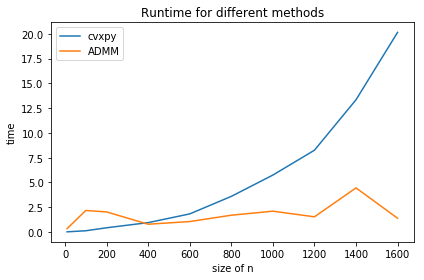

In [9]:
all_lists = [default_time_list, ADMM_time_list]
x = n_range
name = "Runtime for different methods"
label_list = ["cvxpy", "ADMM"]
plot_util(all_lists, x, name, label_list)

In [3]:
default_time_list, IAAL_time_list, ADMM_time_list

([0.01665778160095215,
  0.13747682571411132,
  0.2997716426849365,
  1.0830878257751464,
  2.059067726135254,
  3.8510679721832277,
  5.826599645614624,
  8.225278234481811,
  14.136742544174194,
  20.712745046615602],
 [0.27231392860412595,
  5.017393398284912,
  11.668120193481446,
  26.66370234489441,
  35.449979639053346,
  48.912220525741574,
  58.95455503463745,
  68.73302416801452,
  87.96985960006714,
  106.08670024871826],
 [0.3883089542388916,
  2.106606149673462,
  1.680257511138916,
  6.990504932403565,
  1.2905801773071288,
  1.703009843826294,
  2.3210657596588136,
  28.714737701416016,
  4.701895904541016,
  1.509003210067749])

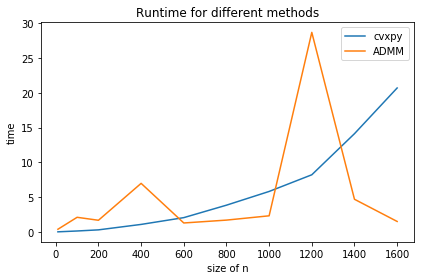

In [9]:
all_lists = [default_time_list, ADMM_time_list]
x = n_range
name = "Runtime for different methods"
label_list = ["cvxpy", "ADMM"]
plot_util(all_lists, x, name, label_list)

In [13]:
def sim_once(n, maxit=1000, alpha=1e-4, strategy="IAAL", is_cyc=False,
	tol=1e-3, use_seed=True, 
	c=[], M=[], A=[], d=[], b=[], 
	argmin_x=None, lambda_star=None, optimal_obj=None):
	# TODO: default values except n
	if optimal_obj == None:
		c, M, A, d, b = sim_data(n, use_seed=use_seed)
		argmin_x, lambda_star, optimal_obj = primal_dual_solver(-c, M, A, d, b)

	if strategy == "IAAL":
		decay = True
		ascent_type = "full"
	elif strategy == "ADMM":
		decay = False
		ascent_type = "vr"
	primal_err_list = []
	lambd_list = [] 
	lambda_err_list = []
	duality_gap_list = []

	s_time = time.time()
	if strategy == "default":
		# rs = general_basic_solver(-c, M, A, d, b)
		rs = primal_dual_solver(-c, M, A, d, b)[0]
	else:
		rs = general_st_sampling_solver(c, M, A, d, b, epoch=maxit, batch_size=1, alpha=alpha,
	                               decay=decay, decay_func=sqrt_decay,
	                               augmented=True, rho=1, prox_type=strategy,
	                               ascent_type=ascent_type, vr_m_order=2,
	                               err_list=primal_err_list, lambd_list=lambd_list, time_hist=[], 
	                               lambda_err_list=lambda_err_list, duality_gap_list=duality_gap_list,
	                               is_rep=False, is_cyc=is_cyc,
	                               answer=[], tol=tol, 
	                               optimal_obj=optimal_obj, lambda_star=lambda_star)
	e_time = time.time()
	total_time = e_time - s_time

	return primal_err_list, lambda_err_list, duality_gap_list, total_time

In [16]:
primal_err_list, lambda_err_list, duality_gap_list, total_time = sim_once(1000, alpha=1e-5, strategy="IAAL", 
                                                                          tol=3e-3)

status: optimal, optimal value: -49292.207107918264
0/1000000.0
10000/1000000.0
20000/1000000.0
30000/1000000.0
40000/1000000.0
50000/1000000.0
60000/1000000.0
70000/1000000.0
80000/1000000.0
90000/1000000.0
100000/1000000.0


KeyboardInterrupt: 

In [15]:
len(lambda_err_list)

51

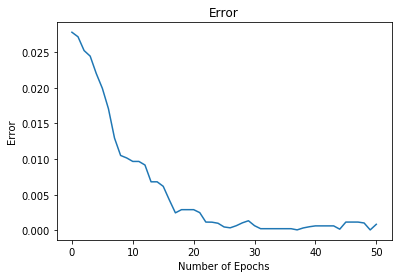

In [16]:
plot_error(primal_err_list)

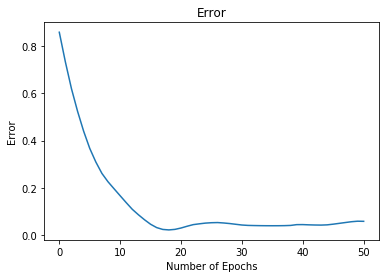

In [17]:
plot_error(lambda_err_list)

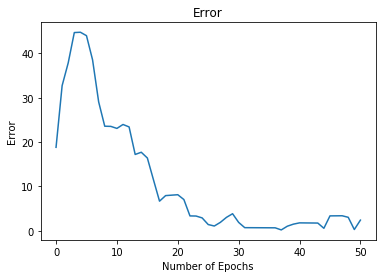

In [18]:
plot_error(duality_gap_list)

In [43]:
duality_gap_list

[2018.1642670716483,
 73.84807995601307,
 101.09985364934283,
 98.2096780588261,
 66.71535861021422,
 17.29489668259208,
 39.89118670326836]